In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
d = pd.read_csv("geo/hts-geo-series-human.csv")

In [75]:
#d = d[d.applymap(np.isscalar)["Sample Count"]]

In [77]:
#d["Sample Count"].max()

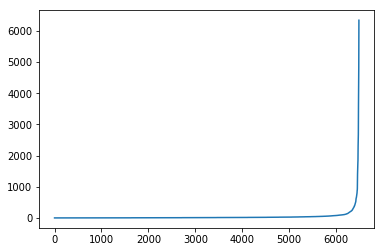

In [84]:
plt.plot(np.sort(d["Sample Count"]))

In [78]:
d["Sample Count"].mean()

42.57147262914418

In [89]:
d = pd.read_csv("geo/array-geo-series-human.csv")

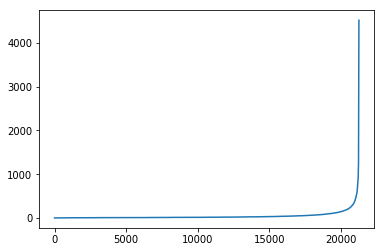

In [90]:
plt.plot(np.sort(d["Sample Count"]))

In [91]:
d["Sample Count"].mean()

43.39351742955262

In [92]:
d["Sample Count"].shape

(21257,)